In [266]:
# import relevant libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [267]:
# import dataset
file = 'airbnb.xlsx'

# assign dataset to a variable
pd.set_option('display.max_columns', 100)
df = pd.read_excel(file)

# view first 20 rows of the dataset
df.head(20)

,Host Id,Host Since,Name,Borough,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaT,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaT,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaT,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
5,1039,2008-07-25,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149,100.0
6,1783,2008-08-12,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250,100.0
7,2078,2008-08-15,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90,94.0
8,2339,2008-08-20,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,1,95,270,90.0
9,2339,2008-08-20,Lovely 2 Bedroom East Village Nest,Manhattan,Apartment,95.0,Entire home/apt,10009.0,2.0,1,23,290,96.0


#### sampling out test set from the data set to reduce risk of data leakage

In [268]:
# import relevant library
from sklearn.model_selection import train_test_split

# set random seed
seed = 234

# split out the test and train sets from the data
Train, Test = train_test_split(df, test_size=.33, random_state=seed)

In [102]:
# save Test set to local machine
#Test.to_csv('airbnbTest.csv')

In [50]:
# save Train set to local machine
#Train.to_csv('airbnbTrain.csv')

### EDA the original dataset - df

In [269]:
# analyse the percentage missing values of each variable from the original datasets
df.isnull().mean()

Host Id                       0.000000
Host Since                    0.000098
Name                          0.000000
Borough                       0.000000
Property Type                 0.000098
Review Scores Rating (bin)    0.273082
Room Type                     0.000000
Zipcode                       0.004397
Beds                          0.002789
Number of Records             0.000000
Number Of Reviews             0.000000
Price                         0.000000
Review Scores Rating          0.273082
dtype: float64

In [270]:
len(df)

30478

In [271]:
# Analyse descriptive stats of numerical variables
df.describe()

,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
count,3.047800e+04,22155.000000,30344.000000,30393.000000,30478.0,30478.000000,30478.000000,22155.000000
mean,1.273171e+07,90.738659,10584.854831,1.530089,1.0,12.018735,163.589737,91.993230
std,1.190270e+07,9.059519,921.299397,1.015359,0.0,21.980703,197.785454,8.850373
min,5.000000e+02,20.000000,1003.000000,0.000000,1.0,0.000000,10.000000,20.000000
25%,2.701298e+06,85.000000,10017.000000,1.000000,1.0,0.000000,80.000000,89.000000
50%,8.551693e+06,90.000000,10065.000000,1.000000,1.0,3.000000,125.000000,94.000000
75%,2.120617e+07,100.000000,11216.000000,2.000000,1.0,13.000000,195.000000,100.000000
max,4.303307e+07,100.000000,99135.000000,16.000000,1.0,257.000000,10000.000000,100.000000


#### visualise distribution of each numerical variable using histogram

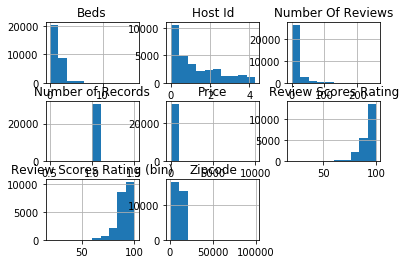

In [113]:
df.hist()
plt.show()

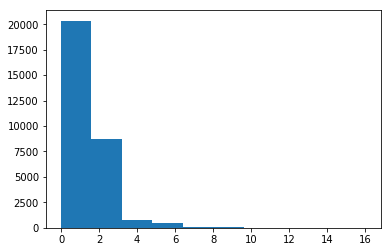

In [117]:
# the distribution of beds. Plotted with plt so as not to tamper with the missing values yet
plt.hist(df['Beds'])
plt.show()

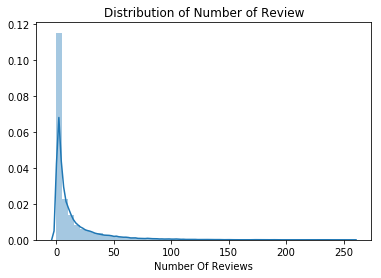

In [116]:
# the distribution of Number Of Reviews
sns.distplot(df['Number Of Reviews'], kde=True).set_title('Distribution of Number of Review')
plt.show()

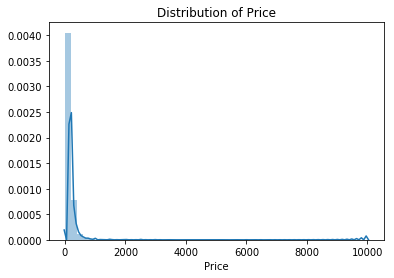

In [118]:
# the distribution of Price
#plt.hist(df['Price'])
sns.distplot(df['Price'], kde=True).set_title('Distribution of Price')
plt.show()

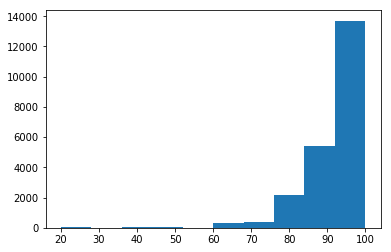

In [119]:
# the distribution of Review Scores Rating
plt.hist(df['Review Scores Rating'])
plt.show()

##### Let's Use Boxplot

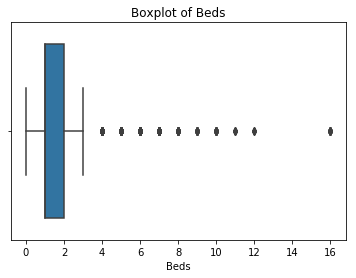

In [120]:
# the distribution of Price
sns.boxplot(df['Beds']).set_title('Boxplot of Beds')
plt.show()

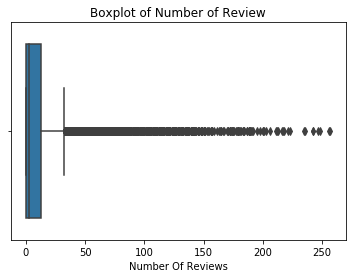

In [121]:
# the distribution of Number Of Reviews
sns.boxplot(df['Number Of Reviews']).set_title('Boxplot of Number of Review')
plt.show()

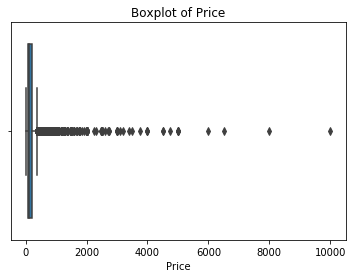

In [122]:
# the distribution of Price
sns.boxplot(df['Price']).set_title('Boxplot of Price')
plt.show()

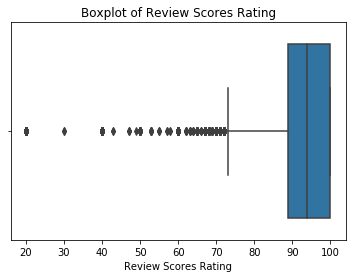

In [123]:
# the distribution of Review Scores Rating
sns.boxplot(df['Review Scores Rating']).set_title('Boxplot of Review Scores Rating')
plt.show()

#### Faceting Price with some categorical variables.

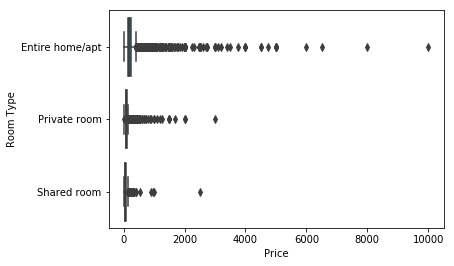

In [124]:
# Faceting Price and Room Type
sns.boxplot(df['Price'], df['Room Type'])
plt.show()

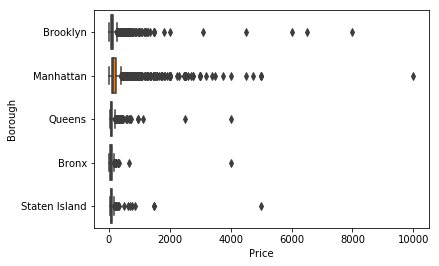

In [125]:
# Faceting Price and Neighbourhood (for some reason, yet unknown, Seaborn is unable to plot this graph)
sns.boxplot(df['Price'], df['Borough'])
plt.show()

#### Analyse association of numerical variables to Price

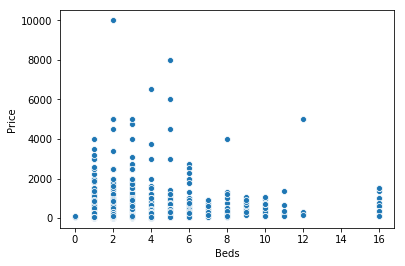

In [126]:
# Association between Beds and Price
sns.scatterplot('Beds', 'Price', data=df)
plt.show()

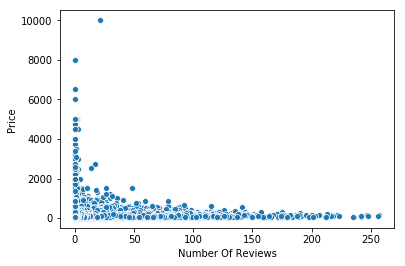

In [127]:
# Association between Number Of Reviews and Price
sns.scatterplot('Number Of Reviews', 'Price', data=df)
plt.show()

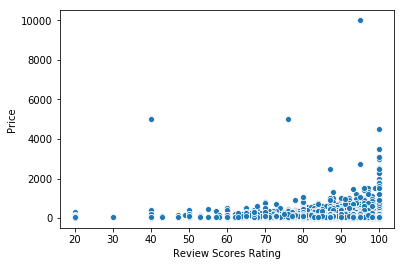

In [128]:
# Association between Review Scores Rating and Price
sns.scatterplot('Review Scores Rating', 'Price', data=df)
plt.show()

In [129]:
df.corr(method='pearson')

,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
Host Id,1.000000,-0.027060,-0.010191,-0.003232,NaN,-0.273226,-0.041046,-0.053590
Review Scores Rating (bin),-0.027060,1.000000,0.023669,-0.075283,NaN,-0.062684,0.059740,0.987201
Zipcode,-0.010191,0.023669,1.000000,0.015414,NaN,-0.018328,-0.118857,0.022110
Beds,-0.003232,-0.075283,0.015414,1.000000,NaN,0.045795,0.316313,-0.070923
Number of Records,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number Of Reviews,-0.273226,-0.062684,-0.018328,0.045795,NaN,1.000000,-0.040600,-0.015185
Price,-0.041046,0.059740,-0.118857,0.316313,NaN,-0.040600,1.000000,0.060703
Review Scores Rating,-0.053590,0.987201,0.022110,-0.070923,NaN,-0.015185,0.060703,1.000000


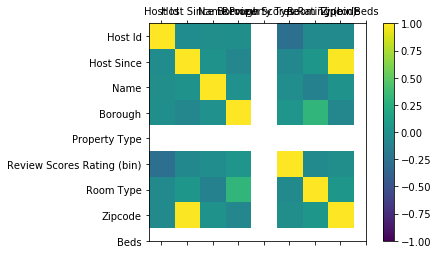

In [130]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

### Data Preparation - performed only on the Train set

In [272]:
# Property Type
# House, Condominium, Townhouse, Villa, Bungalow, Chalet, Castle will be converted to House.
# Dorm, Camper/RV, Treehouse, Tent, Hut and Lighthouse will be converted to Mini_house.
# Apartment, Bed & Breakfast, Other, Loft will be converted to Apartment.
# Boat, Cabin will be converted to Conveyance
Train['Property Type'].unique().tolist()

['Apartment',
 'Loft',
 'House',
 'Condominium',
 'Townhouse',
 'Bed & Breakfast',
 'Tent',
 'Other',
 'Dorm',
 'Treehouse',
 'Camper/RV',
 'Boat',
 'Chalet',
 'Villa',
 'Bungalow',
 'Cabin',
 'Hut',
 nan]

In [273]:
# Room Type
# all Entire home/apt will be converted to Private room
Train['Room Type'].unique().tolist()

['Entire home/apt', 'Private room', 'Shared room']

In [274]:
# I will like to make prediction with the review scores rating being in continuous form so as to see the effect of 1 change in 
# reviews scores rating on price
Train['Review Scores Rating'].unique().tolist()

[87.0,
 85.0,
 90.0,
 nan,
 100.0,
 93.0,
 80.0,
 95.0,
 91.0,
 86.0,
 96.0,
 94.0,
 98.0,
 89.0,
 40.0,
 82.0,
 88.0,
 76.0,
 97.0,
 77.0,
 84.0,
 92.0,
 70.0,
 81.0,
 72.0,
 99.0,
 65.0,
 83.0,
 73.0,
 74.0,
 79.0,
 60.0,
 75.0,
 53.0,
 30.0,
 67.0,
 78.0,
 71.0,
 69.0,
 20.0,
 50.0,
 68.0,
 43.0,
 58.0,
 64.0,
 62.0,
 57.0,
 66.0,
 47.0,
 55.0,
 49.0]

In [275]:
# Use the year values of 'Host Since' and convert it to age of Host to see if there's an effect in the number of years an
# host has been on airbnb in determining price of a home.
# Assumes it's year 2015 and so the oldest host will have an age of 8 and so on

In [276]:
Train.head(1)

,Host Id,Host Since,Name,Borough,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
14983,8235445,2013-08-18,Downtown Brooklyn Living,Brooklyn,Apartment,85.0,Entire home/apt,11201.0,4.0,1,28,163,87.0


In [277]:
# remove irrelevant features
Train.drop(['Host Id', 'Name', 'Review Scores Rating (bin)', 'Zipcode', 'Number of Records'], axis=1, inplace=True)
Train.head(4)

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Host Since,Borough,Property Type,Room Type,Beds,Number Of Reviews,Price,Review Scores Rating
14983,2013-08-18,Brooklyn,Apartment,Entire home/apt,4.0,28,163,87.0
14303,2013-07-13,Manhattan,Apartment,Entire home/apt,3.0,32,206,85.0
5560,2012-02-02,Manhattan,Apartment,Private room,1.0,4,90,90.0
6603,2012-04-23,Brooklyn,Apartment,Entire home/apt,1.0,0,110,NaN


##### Convert Host Since to Years and then age of Host on Airbnb

In [278]:
# Convert Host Since to Years (named it Age already)
Train['Age'] = Train['Host Since'].map(lambda x: x.year)
Train.head()

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Host Since,Borough,Property Type,Room Type,Beds,Number Of Reviews,Price,Review Scores Rating,Age
14983,2013-08-18,Brooklyn,Apartment,Entire home/apt,4.0,28,163,87.0,2013.0
14303,2013-07-13,Manhattan,Apartment,Entire home/apt,3.0,32,206,85.0,2013.0
5560,2012-02-02,Manhattan,Apartment,Private room,1.0,4,90,90.0,2012.0
6603,2012-04-23,Brooklyn,Apartment,Entire home/apt,1.0,0,110,NaN,2012.0
30233,2015-08-19,Brooklyn,Apartment,Private room,1.0,3,70,100.0,2015.0


In [279]:
# fill up Age attribute NAs with the mode value 2015 to allow for easier calculation later
Train.Age.fillna(Train.Age.mode()[0], inplace=True)
Train.head()

,Host Since,Borough,Property Type,Room Type,Beds,Number Of Reviews,Price,Review Scores Rating,Age
14983,2013-08-18,Brooklyn,Apartment,Entire home/apt,4.0,28,163,87.0,2013.0
14303,2013-07-13,Manhattan,Apartment,Entire home/apt,3.0,32,206,85.0,2013.0
5560,2012-02-02,Manhattan,Apartment,Private room,1.0,4,90,90.0,2012.0
6603,2012-04-23,Brooklyn,Apartment,Entire home/apt,1.0,0,110,NaN,2012.0
30233,2015-08-19,Brooklyn,Apartment,Private room,1.0,3,70,100.0,2015.0


In [280]:
# convert values in Age attribute to integer
Train.Age = Train.Age.fillna(0.0).astype(int)
Train.head(3)

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Host Since,Borough,Property Type,Room Type,Beds,Number Of Reviews,Price,Review Scores Rating,Age
14983,2013-08-18,Brooklyn,Apartment,Entire home/apt,4.0,28,163,87.0,2013
14303,2013-07-13,Manhattan,Apartment,Entire home/apt,3.0,32,206,85.0,2013
5560,2012-02-02,Manhattan,Apartment,Private room,1.0,4,90,90.0,2012


In [281]:
# convert the years to age in number of years
Train.Age = 2015 - Train.Age
Train.head(3)

,Host Since,Borough,Property Type,Room Type,Beds,Number Of Reviews,Price,Review Scores Rating,Age
14983,2013-08-18,Brooklyn,Apartment,Entire home/apt,4.0,28,163,87.0,2
14303,2013-07-13,Manhattan,Apartment,Entire home/apt,3.0,32,206,85.0,2
5560,2012-02-02,Manhattan,Apartment,Private room,1.0,4,90,90.0,3


In [282]:
# drop the 'Host Since' variable
Train.drop('Host Since', axis=1, inplace=True)
Train.head(2)

,Borough,Property Type,Room Type,Beds,Number Of Reviews,Price,Review Scores Rating,Age
14983,Brooklyn,Apartment,Entire home/apt,4.0,28,163,87.0,2
14303,Manhattan,Apartment,Entire home/apt,3.0,32,206,85.0,2


In [283]:
Train.isnull().sum()

Borough                    0
Property Type              2
Room Type                  0
Beds                      55
Number Of Reviews          0
Price                      0
Review Scores Rating    5603
Age                        0
dtype: int64

##### Merging values of some attributes to one. This will reduce noise and also for easy modelling.

In [284]:
# For Property Type
# House, Condominium, Townhouse, Villa, Bungalow, Chalet, Castle will be converted to House (They are all similar to being just a house). 
# Dorm, Camper/RV, Treehouse, Tent, Hut and Lighthouse will be converted to Mini_house.
# Apartment, Bed & Breakfast, Other, Loft will be converted to Apartment.
# Boat, Cabin will be converted to Conveyance
#df['Propety_Type'] = 
Train['Property Type'].replace({'Condominium' : 'House', 'Townhouse' : 'House', 'Villa' : 'House', 'Bungalow' : 'House', 'Chalet' : 'House', 'Castle' : 'House',
                                               'Dorm' : 'Mini_house', 'Camper/RV' : 'Mini_house', 'Treehouse' : 'Mini_house', 'Tent' : 'Mini_house', 'Hut' : 'Mini_house', 'Lighthouse' : 'Mini_house',
                                               'Bed' : 'Apartment', 'Bed &Breakfast' : 'Apartment', 'Other' : 'Apartment', 'Loft': 'Apartment',
                                               'Boat' : 'Conveyance', 'Cabin' : 'Conveyance'}, inplace=True)
Train.head(2)

,Borough,Property Type,Room Type,Beds,Number Of Reviews,Price,Review Scores Rating,Age
14983,Brooklyn,Apartment,Entire home/apt,4.0,28,163,87.0,2
14303,Manhattan,Apartment,Entire home/apt,3.0,32,206,85.0,2


In [285]:
# There was a mistake in the first code in converting 'Bed & Breakfast' to 'Apartment'
Train['Property Type'].replace({'Bed & Breakfast' : 'Apartment'}, inplace=True)
Train['Property Type'].unique().tolist()

['Apartment', 'House', 'Mini_house', 'Conveyance', nan]

In [286]:
# For Room Type
# all Entire home/apt will be converted to Private room
Train['Room Type'].replace({'Entire home/apt' : 'Private room'}, inplace=True)
Train['Room Type'].unique().tolist()

['Private room', 'Shared room']

In [287]:
# Checking correlation between predictors and the target (train set)
trainCorr = Train.corr()
trainCorr.Price.sort_values(ascending=False)

Price                   1.000000
Beds                    0.311338
Review Scores Rating    0.055657
Age                     0.022829
Number Of Reviews      -0.036072
Name: Price, dtype: float64

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


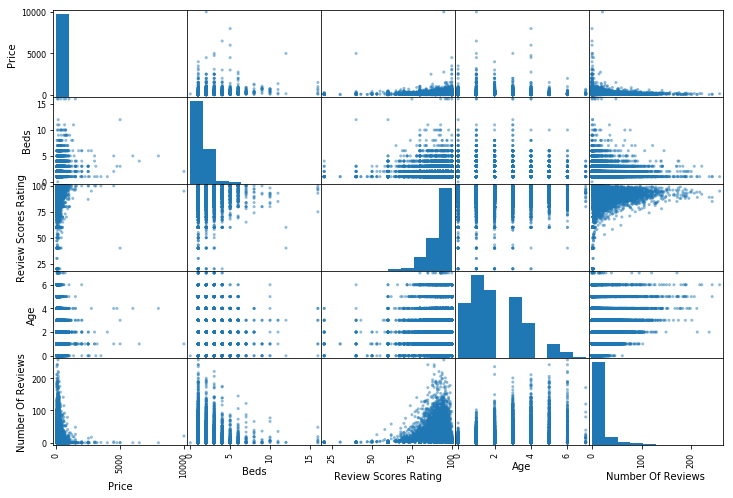

In [288]:
# scatter matrix on the train set
from pandas import scatter_matrix

attributes = ['Price', 'Beds', 'Review Scores Rating', 'Age', 'Number Of Reviews']

scatter_matrix(Train[attributes], figsize=(12,8))
plt.show()

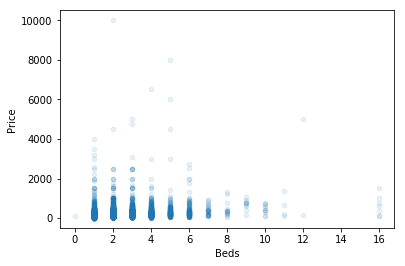

In [149]:
# look deeper into Beds (train set)
Train.plot(kind='scatter', x='Beds', y='Price', alpha=.1)
plt.show()

##### Impute Missing Values

In [289]:
# Label encode all categorical variables to prepare for estimating missing values
Train['Borough'].replace({'Brooklyn' : 1, 'Manhattan' : 2, 'Queens' : 3, 'Bronx' : 4, 'Staten Island' : 5}, inplace=True)
Train['Room Type'].replace({'Private room' : 1, 'Shared room' : 2}, inplace=True)
Train['Property Type'].replace({'Apartment' : 1, 'House' : 2, 'Mini_house' : 3, 'Conveyance' : 4}, inplace=True)
Train.head()

,Borough,Property Type,Room Type,Beds,Number Of Reviews,Price,Review Scores Rating,Age
14983,1,1.0,1,4.0,28,163,87.0,2
14303,2,1.0,1,3.0,32,206,85.0,2
5560,2,1.0,1,1.0,4,90,90.0,3
6603,1,1.0,1,1.0,0,110,NaN,3
30233,1,1.0,1,1.0,3,70,100.0,0


In [290]:
# Fill up missing values with mode and median.
# Mode for Property Type as it is a categorical variable
# Mode for Beds (it's the same value as the median)
# Median for Review Scores Rating. Due to the high amount of outliers, median is better for central tendency.
Train['Property Type'].fillna(Train['Property Type'].mode()[0], inplace=True)
Train['Beds'].fillna(Train['Beds'].mode()[0], inplace=True)
Train['Review Scores Rating'].fillna(Train['Review Scores Rating'].median(), inplace=True)

In [291]:
# check for null values in the data set
Train.isnull().sum()

Borough                 0
Property Type           0
Room Type               0
Beds                    0
Number Of Reviews       0
Price                   0
Review Scores Rating    0
Age                     0
dtype: int64

##### Identifying and removing outliers

In [292]:
# Identify and remove possible outliers from the data
# converting Train set to arrays
trainA = Train.values # trainA means train set arrays

# import relevant library
from sklearn.neighbors import LocalOutlierFactor

# instantiate function
lof = LocalOutlierFactor()
ohat = lof.fit_predict(trainA)

# select non outliers
mask = ohat != -1
trainNO = trainA[mask, :] #trainNO means train set with no outliers

print(trainNO.shape)

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


(18378, 8)


In [293]:
# we can convert it back to pandas dataframe
trainNO = pd.DataFrame(trainNO, columns=list(Train.columns))
trainNO.head(4)

,Borough,Property Type,Room Type,Beds,Number Of Reviews,Price,Review Scores Rating,Age
0,1.0,1.0,1.0,4.0,28.0,163.0,87.0,2.0
1,2.0,1.0,1.0,3.0,32.0,206.0,85.0,2.0
2,2.0,1.0,1.0,1.0,4.0,90.0,90.0,3.0
3,1.0,1.0,1.0,1.0,0.0,110.0,94.0,3.0


In [294]:
# Split out predictors from target variable
trainX = trainNO.drop(['Price'], axis=1)
trainY = trainNO['Price']
trainY.head()

0    163.0
1    206.0
2     90.0
3    110.0
4     70.0
Name: Price, dtype: float64

### CREATE PIPELINE FOR DIFFERENT TRANSFORMATONS ON TRAIN DATASET

##### Pipeline for Numerical Variables
1. simpleImputer for misssing values (median)
2. StandardScaler for feature scaling

##### Pipeline for Categorical Variables
1. simpleImputer for misssing values (mode)
2. OneHotEncoder for creating dummy variables

In [295]:
# split out numerical predictors from trainX
numFeats = ['Beds', 'Number Of Reviews', 'Review Scores Rating', 'Age'] #numFeats means numerical feature columns
trainNum = trainX.loc[:, numFeats]
trainNum.head() # trainNum means trainset numerical predictors

,Beds,Number Of Reviews,Review Scores Rating,Age
0,4.0,28.0,87.0,2.0
1,3.0,32.0,85.0,2.0
2,1.0,4.0,90.0,3.0
3,1.0,0.0,94.0,3.0
4,1.0,3.0,100.0,0.0


In [296]:
# split out categorical predictors from trainX
catFeats = trainX.columns.drop(numFeats) # catFeats means categorical f
trainCat = trainX.loc[:, catFeats]
trainCat.head() # trainCat means train set's categorical predictors

,Borough,Property Type,Room Type
0,1.0,1.0,1.0
1,2.0,1.0,1.0
2,2.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0


#### numpipe > catpipe > columntransformer > pipeline w/ model

In [309]:
# Pipeline for numerical predictors

# import relevant libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# instantiate Pipeline
numPipe = Pipeline([('ImputeNum', SimpleImputer(strategy='median')), ('Scaler', StandardScaler())])

In [310]:
# Pipeline for categorical predictors

# import relevant library
from sklearn.preprocessing import OneHotEncoder

# instantiate Pipeline
catPipe = Pipeline([('ImputeCat', SimpleImputer(strategy='most_frequent')), ('OneHot', OneHotEncoder())])

In [311]:
# Combine the two pipelines using Sklearn's ColumnTransformer

from sklearn.compose import ColumnTransformer

fullPipe = ColumnTransformer([('Nums', numPipe, numFeats), ('Cats', catPipe, catFeats)])

In [312]:
# run pipeline on trainX set
fullPipe.fit(trainX, trainY)
trainXPrep = fullPipe.transform(trainX) # trainXPrep means prepared train predictors
trainXPrep

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[ 2.80607248,  0.68701377, -0.77757634, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.69400295,  0.86797569, -1.05427344, ...,  0.        ,
         1.        ,  0.        ],
       [-0.53013609, -0.39875773, -0.36253071, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.53013609, -0.48923868,  1.02095476, ...,  0.        ,
         1.        ,  0.        ],
       [-0.53013609, -0.57971964,  0.19086348, ...,  0.        ,
         1.        ,  0.        ],
       [-0.53013609, -0.57971964,  0.19086348, ...,  0.        ,
         1.        ,  0.        ]])

### SPOT CHECK ALGORITHMS

In [202]:
# import relevant libraries
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# define the pipeline
models = []

models.append(('LR', LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR()))
models.append(('CART', DecisionTreeRegressor()))

# empty lists to store model names and results
results = []
names = []

# Kfold and cross validation parameters
seed = 234
num_fold = 10
num_repeat = 3
scoring = 'neg_mean_squared_error'

for name, model in models:
    kfold = RepeatedStratifiedKFold(n_splits=num_fold, n_repeats=num_repeat, random_state=seed)
    cv_results = cross_val_score(model, trainXPrep, trainY, cv=kfold, scoring=scoring, n_jobs=-1)
    
    # append each model results into empty lists created
    results.append(cv_results)
    names.append(name)
    
    # output to evaluate results
    rmse = np.sqrt(-cv_results)
    see_results = '%s: %f (%f)' % (name, rmse.mean(), rmse.std())
    print(see_results)

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


LR: 124.746546 (12.923675)


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Lasso: 125.043897 (13.023372)


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


EN: 128.672239 (13.476849)


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


KNN: 130.477919 (10.617437)


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


SVR: 130.087778 (13.685678)


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


CART: 142.746835 (13.142532)


In [201]:
# To use KFold instead of RepeatedStratifiedKFold
from sklearn.model_selection import KFold

# define models
kmodels = []

kmodels.append(('LR', LinearRegression()))
kmodels.append(('Lasso', Lasso()))
kmodels.append(('EN', ElasticNet()))
kmodels.append(('KNN', KNeighborsRegressor()))
kmodels.append(('SVR', SVR()))
kmodels.append(('CART', DecisionTreeRegressor()))

# empty lists to store model names and results
kresults = []
knames = []

# Kfold and cross validation parameters
seed = 234
num_fold = 10
scoring = 'neg_mean_squared_error'

for kname, kmodel in kmodels:
    kfold_cv = KFold(n_splits=num_fold, random_state=seed)
    kcv_results = cross_val_score(kmodel, trainXPrep, trainY, cv=kfold_cv, scoring=scoring)
    
    # append each model results into empty lists created
    kresults.append(kcv_results)
    knames.append(kname)
    
    # output to evaluate results
    rmse = np.sqrt(-kcv_results)
    see_kresults = '%s: %f (%f)' % (kname, rmse.mean(), rmse.std())
    print(see_kresults)

LR: 125.136828 (8.560998)
Lasso: 125.446618 (8.509555)
EN: 129.153734 (8.148078)
KNN: 132.153857 (10.282442)


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\U

SVR: 130.638548 (7.536578)
CART: 140.570193 (14.052407)


###### Decision tree regressor seem to be overfitting the data, which seemed to have been exposed by using cross validation technique

In [207]:
# Try some Ensemble Techniques
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


emodels = []

emodels.append(('RF', RandomForestRegressor()))
emodels.append(('GB', GradientBoostingRegressor()))

# empty lists to store model names and results
eresults = []
enames = []

# Kfold and cross validation parameters
seed = 234
num_fold = 10
scoring = 'neg_mean_squared_error'

for ename, emodel in emodels:
    ekfold = KFold(n_splits=num_fold, random_state=seed)
    ecv_results = cross_val_score(emodel, trainXPrep, trainY, cv=kfold_cv, scoring=scoring)
    
    # append each model results into empty lists created
    eresults.append(ecv_results)
    enames.append(ename)
    
    # output to evaluate results
    ermse = np.sqrt(-ecv_results)
    see_eresults = '%s: %f (%f)' % (ename, ermse.mean(), ermse.std())
    print(see_eresults)

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

RF: 128.000795 (9.147645)
GB: 121.424598 (8.900492)


### Fine Tune promising Model with GridSeearchCV

In [301]:
# import relevant libraries
from sklearn.model_selection import GridSearchCV

# set parameters
estimators = [100, 150, 200, 250, 300]
loss = ['ls', 'quantile', 'huber']
max_feat = ['sqrt', 'log2']
param_grid = dict(loss=loss, n_estimators=estimators, max_features=max_feat)

# instantiate model
model = GradientBoostingRegressor()

# Kfold and cross validation parameters
seed = 234
num_fold = 10
scoring = 'neg_mean_squared_error'

# gridsearchCV
kfold = KFold(n_splits=num_fold, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(trainXPrep, trainY)

# print result
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -14738.000733 using {'loss': 'ls', 'max_features': 'log2', 'n_estimators': 300}
-14896.763071 (2146.680327) with: {'loss': 'ls', 'max_features': 'sqrt', 'n_estimators': 100}
-14812.885988 (2140.983108) with: {'loss': 'ls', 'max_features': 'sqrt', 'n_estimators': 150}
-14795.934292 (2157.425637) with: {'loss': 'ls', 'max_features': 'sqrt', 'n_estimators': 200}
-14779.086956 (2158.716712) with: {'loss': 'ls', 'max_features': 'sqrt', 'n_estimators': 250}
-14772.319140 (2154.774155) with: {'loss': 'ls', 'max_features': 'sqrt', 'n_estimators': 300}
-14919.537272 (2089.570259) with: {'loss': 'ls', 'max_features': 'log2', 'n_estimators': 100}
-14820.340415 (2122.330385) with: {'loss': 'ls', 'max_features': 'log2', 'n_estimators': 150}
-14799.399338 (2195.218719) with: {'loss': 'ls', 'max_features': 'log2', 'n_estimators': 200}
-14822.519303 (2133.304825) with: {'loss': 'ls', 'max_features': 'log2', 'n_estimators': 250}
-14738.000733 (2168.544998) with: {'loss': 'ls', 'max_features': 'lo

### Prepare and transform the test set

In [306]:
# Create Age variable from Host Since
Test['Age'] = Test['Host Since'].map(lambda x: x.year) # create variable with age and populate with year of Host Since
Test['Age'].fillna(Test['Age'].mode()[0], inplace=True) # fill up missing values with mode if any
Test['Age'] = Test['Age'].fillna(0.0).astype(int) # convert values to integers
Test['Age'] = 2015 - Test['Age']

# Reduce/merge categories of Property Type and Room Type
Test['Property Type'].replace({'Condominium' : 'House', 'Townhouse' : 'House', 'Villa' : 'House', 'Bungalow' : 'House', 'Chalet' : 'House', 'Castle' : 'House',
                                               'Dorm' : 'Mini_house', 'Camper/RV' : 'Mini_house', 'Treehouse' : 'Mini_house', 'Tent' : 'Mini_house', 'Hut' : 'Mini_house', 'Lighthouse' : 'Mini_house',
                                               'Bed' : 'Apartment', 'Bed & Breakfast' : 'Apartment', 'Other' : 'Apartment', 'Loft': 'Apartment',
                                               'Boat' : 'Conveyance', 'Cabin' : 'Conveyance'}, inplace=True)
Test['Room Type'].replace({'Entire home/apt' : 'Private room'}, inplace=True)

# Replace categories in Borough, Property Type and Room Type with numbers
Test['Borough'].replace({'Brooklyn' : 1, 'Manhattan' : 2, 'Queens' : 3, 'Bronx' : 4, 'Staten Island' : 5}, inplace=True)
Test['Room Type'].replace({'Private room' : 1, 'Shared room' : 2}, inplace=True)
Test['Property Type'].replace({'Apartment' : 1, 'House' : 2, 'Mini_house' : 3, 'Conveyance' : 4}, inplace=True)

# Drop irrelevant variables - 'Host Id', 'Host Since', 'Name', 'Review Scores Rating (bin)', 'Zipcode', 'Number of Records'
Test.drop(['Host Id', 'Host Since', 'Name', 'Review Scores Rating (bin)', 'Zipcode', 'Number of Records'], axis=1, inplace=True)
Test.head(4)

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Borough,Property Type,Room Type,Beds,Number Of Reviews,Price,Review Scores Rating,Age
20546,3,1.0,1,2.0,0,59,NaN,1
5032,2,1.0,1,1.0,10,350,98.0,4
2600,2,1.0,1,1.0,13,110,95.0,4
13703,1,1.0,1,1.0,26,80,83.0,2


In [307]:
# Split out Test predictors from test target
testX = Test.drop(['Price'], axis=1)
testY = Test['Price']
testX.head()

,Borough,Property Type,Room Type,Beds,Number Of Reviews,Review Scores Rating,Age
20546,3,1.0,1,2.0,0,NaN,1
5032,2,1.0,1,1.0,10,98.0,4
2600,2,1.0,1,1.0,13,95.0,4
13703,1,1.0,1,1.0,26,83.0,2
6681,1,1.0,1,2.0,3,99.0,3


In [314]:
# Transform Test predictors
testXPrep = fullPipe.transform(testX) # testXPrep means prepared test predictors
testXPrep

array([[ 0.58193343, -0.57971964,  0.19086348, ...,  0.        ,
         1.        ,  0.        ],
       [-0.53013609, -0.12731485,  0.74425767, ...,  0.        ,
         1.        ,  0.        ],
       [-0.53013609,  0.00840659,  0.32921203, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.58193343,  0.32508994, -1.46931908, ...,  0.        ,
         1.        ,  0.        ],
       [-0.53013609, -0.57971964,  0.19086348, ...,  0.        ,
         1.        ,  0.        ],
       [-0.53013609,  0.14412802, -1.05427344, ...,  0.        ,
         1.        ,  0.        ]])

In [316]:
from sklearn.metrics import mean_squared_error

finalModel = grid_result.best_estimator_


predictions = finalModel.predict(testXPrep)

finalMSE = mean_squared_error(testY, predictions)
finalRMSE = np.sqrt(finalMSE)

print(f' MSE is {finalMSE} and RMSE is {finalRMSE}')

 MSE is 25915.827323406313 and RMSE is 160.98393498547088


In [317]:
from sklearn.externals import joblib

joblib.dump([fullPipe, finalModel], 'airbnbModel.sav', compress=1)

['airbnbModel.sav']